<Figure size 640x480 with 0 Axes>

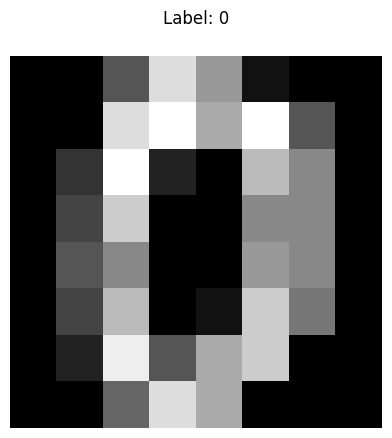

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data
y = digits.target

img_label = 0

plt.gray()
plt.matshow(digits.images[img_label])
plt.title('Label: {}'.format(y[img_label]))
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.3)

print('x_train', x_train.shape)
print('x_val', x_val.shape)
print('x_test', x_test.shape)

print('y_train', y_train.shape)
print('y_val', y_val.shape)
print('y_test', y_test.shape)

x_train (879, 64)
x_val (378, 64)
x_test (540, 64)
y_train (879,)
y_val (378,)
y_test (540,)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(16,16, ), activation='relu',max_iter=1000, epsilon=1e-08)

mlp.fit(x_train, y_train)
prediksi_val = mlp.predict(x_val)
acc_val = accuracy_score(y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.9576719576719577


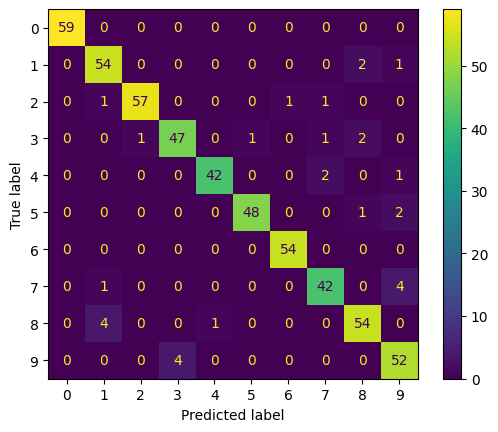

Akurasi Testing ANN: 0.9425925925925925


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

prediksi = mlp.predict(x_test)
accuracy = accuracy_score(y_test, prediksi)

conf_matrix = confusion_matrix(y_test, prediksi)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val,10)
y_test_2 = np.copy(y_test)
y_test = to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/100
18/18 [==============================] - 3s 39ms/step - loss: 6.3469 - acc: 0.1331 - val_loss: 4.4568 - val_acc: 0.1349
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 3.5459 - acc: 0.1820 - val_loss: 2.8058 - val_acc: 0.2222
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 2.4354 - acc: 0.2753 - val_loss: 2.1337 - val_acc: 0.2857
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 1.9727 - acc: 0.3458 - val_loss: 1.8753 - val_acc: 0.3730
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 1.7126 - acc: 0.4346 - val_loss: 1.6830 - val_acc: 0.4471
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 1.5256 - acc: 0.5074 - val_loss: 1.5392 - val_acc: 0.4894
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 1.3676 - acc: 0.5575 - val_loss: 1.3917 - val_acc: 0.5344
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 1.2

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 1482 (5.79 KB)
Trainable params: 1482 (5.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Akurasi Testing ANN:', accuracy)

17/17 [==============================] - 0s 3ms/step - loss: 0.1731 - acc: 0.9519
Akurasi Testing ANN: 0.9518518447875977


17/17 [==============================] - 0s 3ms/step


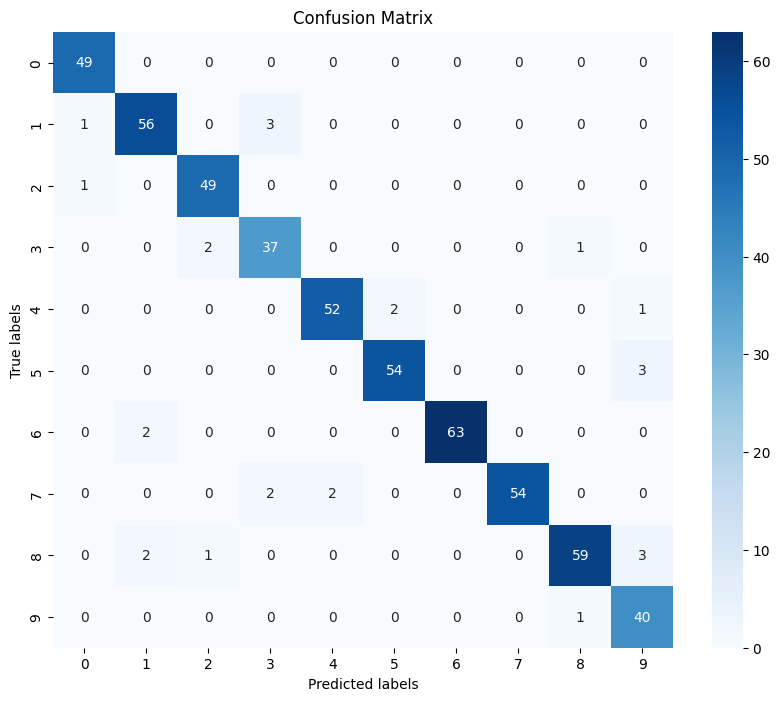

In [ ]:
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()